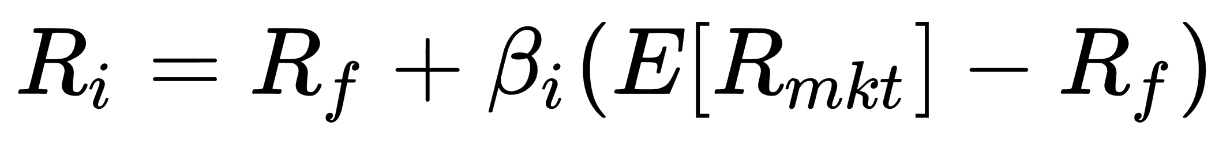

Para um título i, seus retornos são definidos como Ri e seu beta como βi. O CAPM define o retorno do título como a soma da taxa livre de risco, Rf, e a multiplicação de seu beta pelo prêmio de risco. O prêmio de risco pode ser pensado como os retornos excedentes da carteira de mercado, excluindo a taxa livre de risco. A seguir, uma representação visual do CAPM:

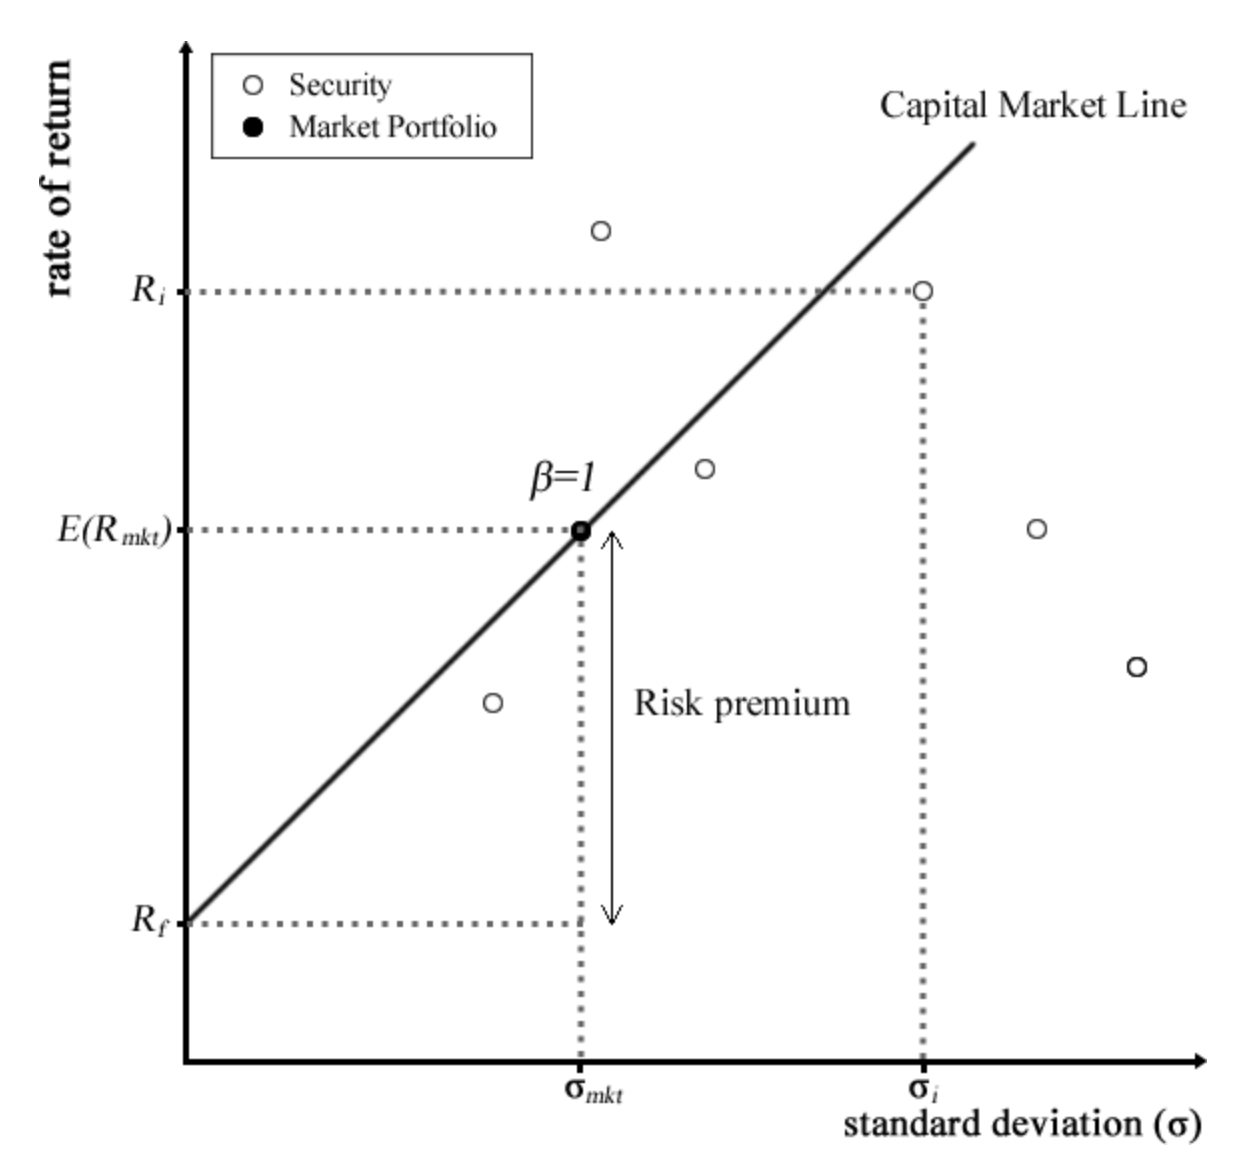

 - Beta é uma medida do risco sistemático de uma ação – um risco que não pode ser afastado por diversificação. Em essência, descreve a sensibilidade dos retornos das ações em relação aos movimentos do mercado.
 - Por exemplo, uma ação com um beta igual a zero não produz retornos excessivos, independentemente da direção em que o mercado se move. Ela só pode crescer a uma taxa livre de risco.
 - Uma ação com um beta de 1 indica que a ação se move perfeitamente com o mercado.

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd

import yfinance as yf

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas_datareader as dr

import warnings
warnings.filterwarnings("ignore")

In [2]:
tickers = ["^BVSP", "PETR4.SA"]

ativos = []
for ticker in tickers:
    try:
        cotacoes = dr.DataReader(ticker, "yahoo", "01/01/2012")["Adj Close"]
        cotacoes = pd.DataFrame(cotacoes)
        cotacoes.columns = [ticker]
        ativos.append(cotacoes)
    except:
        pass
    base_ativos = pd.concat(ativos, axis = 1)
base_ativos.sort_index(inplace = True)
base_ativos.head()

,^BVSP,PETR4.SA
Date,,
2012-01-02,NaN,8.604888
2012-01-03,59265.0,8.947164
2012-01-04,59365.0,9.011044
2012-01-05,58546.0,8.907239
2012-01-06,58600.0,8.915224


In [3]:
# Ficamos apenas com os retornos
base_ativos = pd.DataFrame(base_ativos.pct_change())
base_ativos.dropna(inplace = True)

In [4]:
base_ativos

,^BVSP,PETR4.SA
Date,,
2012-01-04,0.001687,0.007140
2012-01-05,-0.013796,-0.011520
2012-01-06,0.000922,0.000896
2012-01-09,0.008242,0.013435
2012-01-10,0.012237,0.011931
...,...,...
2022-12-09,0.004140,-0.002825
2022-12-12,-0.022519,-0.032376
2022-12-13,-0.013034,-0.024676


In [5]:
# Calcule o retorno esperado do mercado usando os dados históricos
market_mean_return = np.mean(base_ativos.iloc[:,0])

# Calcule a matriz de covariância para o mercado e o ativo
cov_matrix = np.cov(base_ativos.iloc[:,0], base_ativos.iloc[:,1])

# Extraia a covariância entre o mercado e o ativo
market_asset_cov = cov_matrix[0,1]

# Calcule o beta do ativo (ou seja, a sensibilidade dos retornos do ativo aos retornos do mercado)
beta = market_asset_cov / np.var(base_ativos.iloc[:,0])

### Por que a matriz de covariância tem 4 elementos
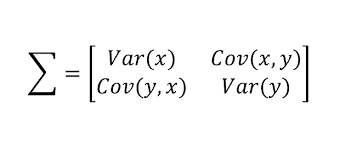

In [6]:
beta

1.4973261096216395

In [7]:
np.var(base_ativos.iloc[:,0])

0.00024548509348712764

In [8]:
cov_matrix

array([[0.00024558, 0.00036757],
       [0.00036757, 0.00094038]])

In [9]:
cov_matrix[0,1]

0.0003675712400011853

In [12]:
# Calcular o retorno esperado do ativo usando o modelo CAPM
selic = 0.1375
expected_return = selic + beta * (market_mean_return - selic)
print(str(np.round(expected_return*100, 2)) + "%")

-6.79%


In [13]:
# Também é possível fazer via regressão linear

x_train = sm.add_constant(base_ativos.iloc[:,0])
y_train = base_ativos.iloc[:,1]

lr_sm = sm.OLS(y_train, x_train).fit()

y_pred_train_sm = lr_sm.predict(x_train)

# Print out the statistics
lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PETR4.SA   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     3828.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:04:58   Log-Likelihood:                 6807.9
No. Observations:                2717   AIC:                        -1.361e+04
Df Residuals:                    2715   BIC:                        -1.360e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.829      0.407      -0.000       0.001
^BVSP          1.4968      0.024     61.871      0.000       1.449       1.544
==============================================================================
Omnibus:                      362.304   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3361.437
Skew:                          -0.294   Prob(JB):                         0.00
Kurtosis:                       8.417   Cond. No.                         63.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
print(lr_sm.params)

const    0.000314
^BVSP    1.496775
dtype: float64


In [15]:
print("Beta da regressão: " + str(lr_sm.params[1]))
print("Beta do passo a passo: " + str(beta))

Beta da regressão: 1.4967750142555643
Beta do passo a passo: 1.4973261096216395
